# 谈谈我对梯度下降法的简单理解

以下是我在训练营中对梯度下降法的初步认识\
为什么需要梯度下降？\
因为有些函数可以直接根据公式求出其最小值点，但是有些函数求解的难度太大。所幸，他的图像是一座山谷，所以我们可以通过梯度下降法一步步滚动到谷底（数学：逼近最小值点）

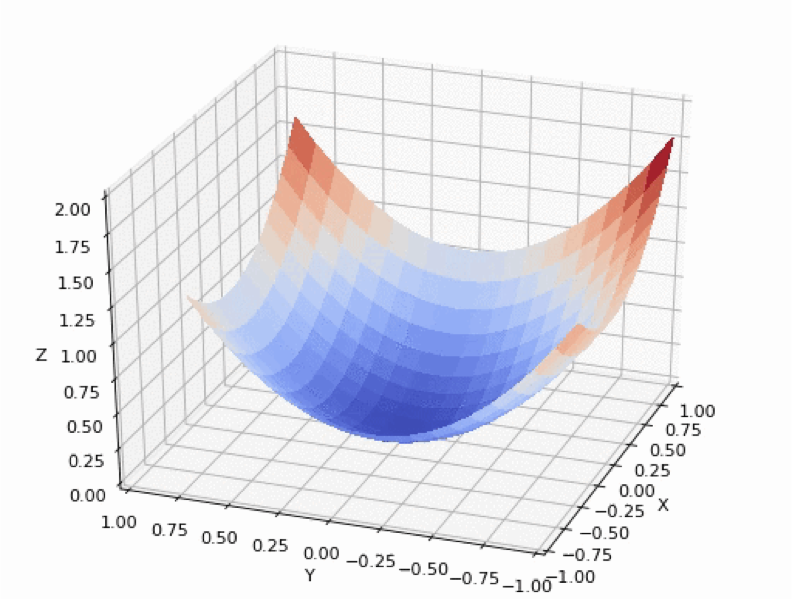

我们还是从一元函数为例讲解梯度下降，之后再推广到多元函数\
以最简单的凸函数$f(x)=x^2$为例\
**梯度向量**：指向函数值增长最快的**方向**
所以如果**取负**的梯度向量，则是指向函数之**减少最快**的方向

$f(x)=x^2$的梯度向量为

$$\nabla (x_p) = f^{\prime} (x_p)i = (2x|_{x=x_p}) = 2x_p $$

假设起点在$x_0=10$处，也就是将球放在$x_0=10$处\
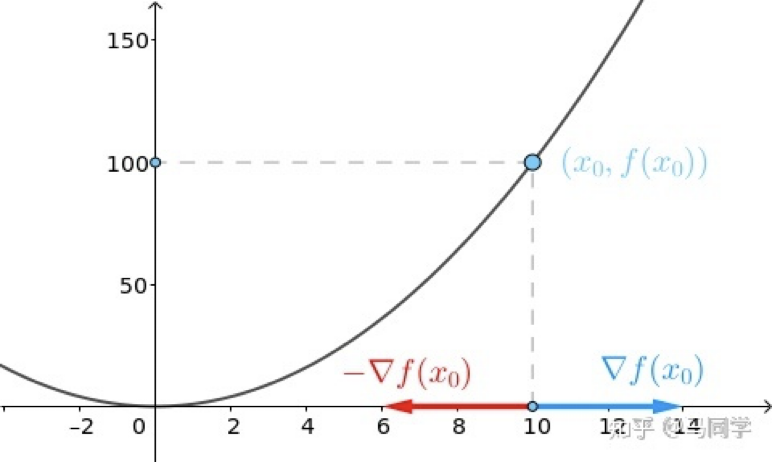

此时，它的梯度向量为$$2*10=20$$
我们还要一个描述球滚动的快慢程度，叫步长$\alpha$（也称学习率）

此节将$\alpha$设为0.2，那么：$$x_1 = x_0 - \alpha \nabla f(x_0)$$

此时，小球下降到了$x_1=6$这个位置
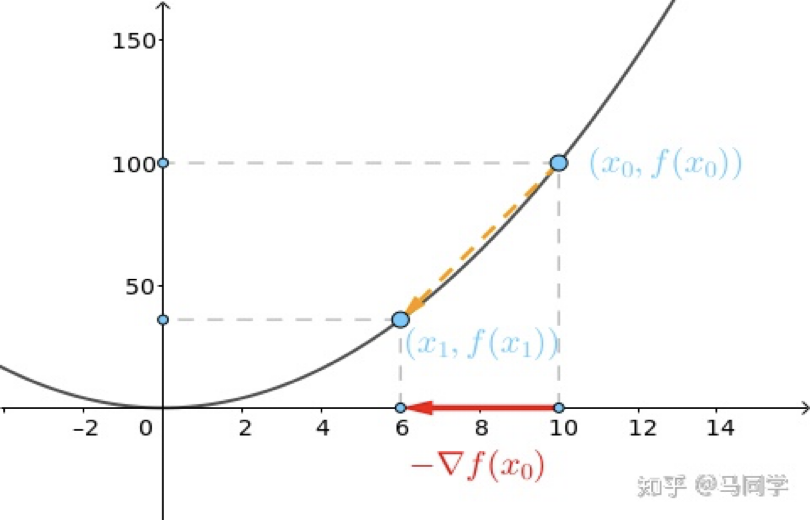

接着迭代下去:\
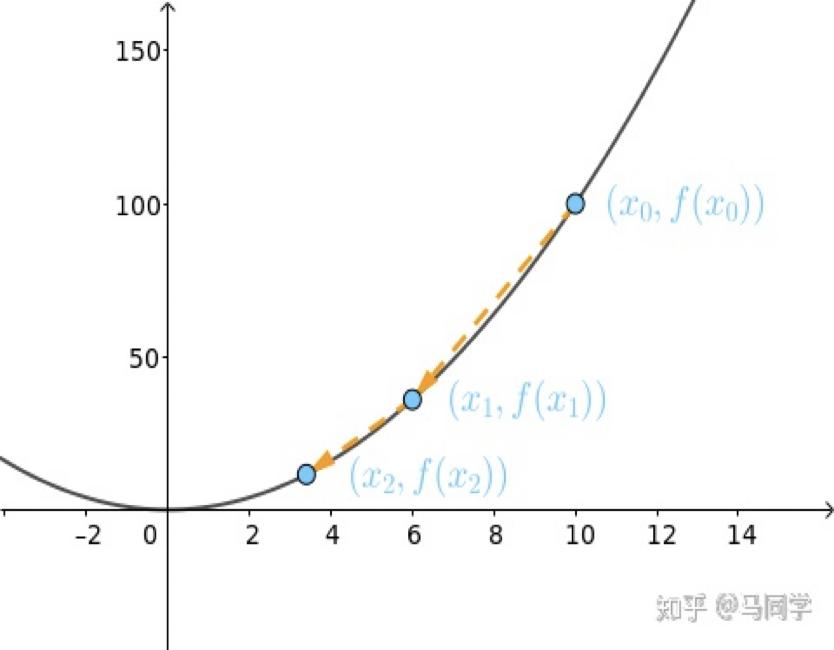

最终到达最低点\
三维同理

经过上述的理解，可以知道通过**求梯度与设定学习率（步长）**经过**迭代**最终达到**最小值点**，那我们求出**损失函数对w的偏导**，进行梯度下降即可\
$$
{\partial L(\omega) \over \partial \omega}={{\omega^TX^TX\omega-2\omega^TX^Ty+y^Ty} \over \partial \omega}\\
=2X^TX\omega-2X^Ty=0\\
\implies \omega = (X^TX)^{-1}X^Ty
$$
$$(损失函数求偏导数)$$

### 代码实现

##### 导入库

In [42]:
import numpy as np
import pandas as pd

In [43]:
data = pd.read_csv(r"/Users/linjiahao/boston_house_price_english.csv")
print(type(data))
data.head()

<class 'pandas.core.frame.DataFrame'>


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [44]:
class linearRegression:
    """python语言实现线性回归算法。（梯度下降实现）"""
    
    def __init__(self,alpha,times):
        """初始化方法
        
        Parameters：
        ----------------------
        alpha：float
               学习率，用来控制步长。（权重调整的幅度）
        times： int
                循环迭代的次数。  
                
        """
        self.alpha = alpha
        self.times = times
        
    def fit(self,X,y):
        """根据提供的训练数据，对模型进行训练
        
        Parameters:
        -----------------
        X：类数组类型。形状：[样本数量，特征数量]
           特征矩阵，用来对模型进行训练。
        y：类数组类型，形状：[样本数量]
          目标值（标签信息）。
        """
        
        X = np.asarray(X)
        y = np.asarray(y)
        # 创建权重向量，初始值为0（或任何其他值），长度比特征数量多1（多出的就是截距）。
        self.w_ = np.zeros(1 + X.shape[1])
        # 创建损失列表，用来保存每次迭代后的损失值，损失值计算：（预测值 - 真实值）的平方和除以2.
        self.loss_ = []
        
        #进行循环多次迭代，在每次迭代过程中，不断调整权重值，使得损失值不断下降。
        for i in range(self.times):
            # 计算预测值 y = w0 + w1*x1 + w2*x2 ...
            y_hat = np.dot(X,self.w_[1:]) + self.w_[0]
            # 计算真实值与预测值之间的差距。
            error = y - y_hat
            # 计算损失值 损失值计算：（预测值 - 真实值）的平方和除以2
            self.loss_.append(np.sum(error ** 2) / 2)
            # 根据差距调整权重w_，根据公式：调整为 权重(j) = 权重(j) + 学习率*sum((y-y_hat)*x(j))
            self.w_[0] += self.alpha * np.sum(error * 1)
            self.w_[1:] += self.alpha * np.dot(X.T,error) 
    
    def predict(self,X):
        """根据参数传递的样本，对样本数据进行预测
        
        Parameters:
        -----------------
        X：类数组类型。形状：[样本数量，特征数量]
           待测试样本。
        
        Return:
        -----------------
        result：数组类型
               预测的结果。
        """
        
        X = np.asarray(X)
        result = np.dot(X,self.w_[1:]) + self.w_[0]
        return result


In [45]:
lr = linearRegression(alpha=0.0005,times=20)
t = data.sample(len(data),random_state=0)
train_X = t.iloc[:400,:-1]
train_y = t.iloc[:400,-1]
test_X = t.iloc[400:,:-1]
test_y = t.iloc[400:,-1]

lr.fit(train_X,train_y)
result = lr.predict(test_X)
display(np.mean((result - test_y)** 2))
display(lr.w_)
display(lr.loss_)


2.5269094172606156e+194

array([-4.91840744e+91, -2.24201028e+92, -4.88461060e+92, -5.87006550e+92,
       -3.32031749e+90, -2.77875440e+91, -3.06624018e+92, -3.47870767e+93,
       -1.79024405e+92, -5.41134085e+92, -2.15329860e+94, -9.17485507e+92,
       -1.74958006e+94, -6.49542169e+92])

[116831.44,
 352143849427807.9,
 1.3577876251262872e+24,
 5.238506743432333e+33,
 2.0210852043054447e+43,
 7.797614241008512e+52,
 3.0084227883234446e+62,
 1.1606893331181648e+72,
 4.478093083336439e+81,
 1.727707586417883e+91,
 6.665724558681856e+100,
 2.571724766477211e+110,
 9.922054558792244e+119,
 3.8280599833591215e+129,
 1.4769162121982115e+139,
 5.698138240613037e+148,
 2.1984171573830035e+158,
 8.481784389555278e+167,
 3.272384687742424e+177,
 1.2625293278803267e+187]

通过模型参数，我们发现无论模型的权重特别的大，并且损失值随着迭代次数的增加不但没有下降，反而在增加。这很不科学，究竟是为何？
不同特征的取值不是一个“数量级“。因此需要进行特征列的标准化，即每个特征列都要调整为标准正态分布. Xi~N(0,1)。

#### 标准化

In [46]:
class StandardScaler:
    """该类对数据进行标准化处理。每一列变为标准正态分布 X~N(0,1.ipynb_checkpoints\)"""
    def fit(self,X):
        """根据传递的样本，计算每个特征列的均值与标准差
       
       Parameters：
        X: 类数组类型
           训练数据，用来计算均值与标准差
        """
        
        X = np.asarray(X)
        # axis=0 按列
        self.std_ = np.std(X,axis=0)
        self.mean_ = np.mean(X,axis=0)
    
    def transform(self,X):
        """对给定的数据X进行标准化处理，将X的每一列都变成标准正态分布的数据。
        
        Parameters：
        X: 类数组类型
           待转换数据。
           
        Return:
        result: 类数组类型
               参数X转换成标准正态分布后的结果。
        """
        
        return (X - self.mean_)/self.std_
    
    def fit_transform(self,X):
        """对数据进行训练，并转换，返回转换之后的结果
        
        Parameters：
        X: 类数组类型
           待转换数据。
           
        Return:
        result: 类数组类型
               参数X转换成标准正态分布后的结果。
        
        """
        self.fit(X)
        return self.transform(X)


标准化后再次训练&预测

In [47]:
# 为了避免每个特征数量级的不同，从而在梯度下降过程中带来的影响。
# 我们现在考虑进行标准化处理。
lr = linearRegression(alpha=0.0005,times=20)
t = data.sample(len(data),random_state=0)
train_X = t.iloc[:400,:-1]
train_y = t.iloc[:400,-1]
test_X = t.iloc[400:,:-1]
test_y = t.iloc[400:,-1]

# 标准化处理
s = StandardScaler()
train_X = s.fit_transform(train_X)
test_X = s.fit_transform(test_X)

s2 = StandardScaler()
train_y = s2.fit_transform(train_y)
test_y = s2.fit_transform(test_y)

# 训练 预测
lr.fit(train_X, train_y)
result = lr.predict(test_X)
display(np.mean((result - test_y)**2))
display(lr.w_)
display(lr.loss_)


0.14907214335261093

array([ 1.69697589e-16, -7.82096101e-02,  3.27417218e-02, -4.18423834e-02,
        7.23915815e-02, -1.22422484e-01,  3.18709730e-01, -9.44094559e-03,
       -2.09320117e-01,  1.04023908e-01, -5.20477318e-02, -1.82216410e-01,
        9.76133507e-02, -3.94395606e-01])

[200.0,
 107.18106695239439,
 88.90466866295793,
 79.78035025519532,
 74.3187880885867,
 70.90417512718281,
 68.69155318506807,
 67.20013197881177,
 66.15079837015878,
 65.37902020765745,
 64.78625525603303,
 64.31246996531247,
 63.9204121068791,
 63.58650021098896,
 63.29547926726485,
 63.03724485771134,
 62.804930639516634,
 62.593740880475195,
 62.40022787877571,
 62.22183840063285]

In [48]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

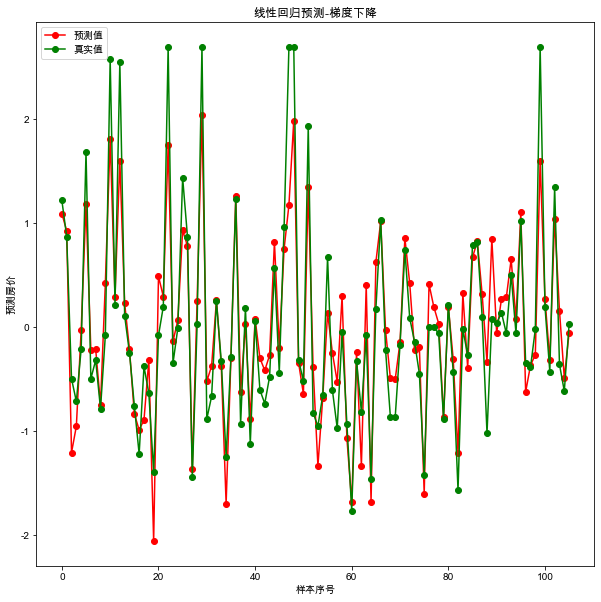

In [49]:
plt.figure(figsize=(10,10))
plt.plot(result, "ro-", label="预测值")
plt.plot(test_y.values, "go-", label="真实值") # pandas读取时serise类型，我们需要转为ndarray
plt.title("线性回归预测-梯度下降")
plt.xlabel("样本序号")
plt.ylabel("预测房价")
plt.legend()
plt.show()

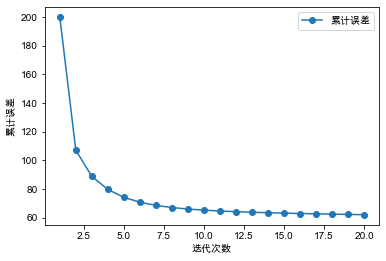

In [50]:
# 绘制累计误差
plt.plot(range(1,lr.times+1),lr.loss_,"o-",label="累计误差")
plt.xlabel("迭代次数")
plt.ylabel("累计误差")
plt.legend()
plt.show()

In [51]:
# 因为房价分析涉及多个维度，不方便进行可视化，为了实现可视化，
# 我们只选取其中一个维度（rm），并画出直线，实现拟合。
lr = linearRegression(alpha=0.0005,times=50)
t = data.sample(len(data),random_state=0)
train_X = t.iloc[:400,5:6] # 返回二维dataframe类型 [:400,5]将是一维series
train_y = t.iloc[:400,-1]
test_X = t.iloc[400:,5:6]
test_y = t.iloc[400:,-1]

# 对数据标准化
s = StandardScaler()
train_X = s.fit_transform(train_X)
test_X = s.transform(test_X)

s2= StandardScaler()
train_y = s2.fit_transform(train_y)
test_y = s2.transform(test_y)

lr.fit(train_X,train_y)
result = lr.predict(test_X)
display(np.mean((result - test_y)**2))

0.46071758937162155

array([-2.77111667e-16,  6.54984608e-01])

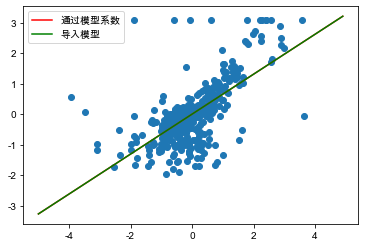

In [52]:
plt.scatter(train_X["rm"],train_y)
#查看方程系数
display(lr.w_)
# 构建方程 y = -3.03757020e-16 + 6.54984608e-01*x
x = np.arange(-5,5,0.1)
y = -3.03757020e-16 + 6.54984608e-01*x
plt.plot(x,y,"r", label="通过模型系数")
# 也可以这样做 直接将x套入模型，需要将x变成二维结构
plt.plot(x,lr.predict(x.reshape(-1,1)),"g" ,label="导入模型")
plt.legend()
plt.show()
# 两个直线重合

OK！misson complete！
$$designed\; by \qquad Lin Jhao\\
from \qquad Jhao's \;notebook$$